In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('playstorescrapping.csv')


In [3]:
df.head()

,userName,score,content
0,GOHIL HARDEVSINH,5,Very very nice application and team..👌👌
1,Margaret Hoy,5,Quite happy with this app
2,Raffael Kummer,5,Works perfectly again
3,David VigilDRV,5,Great App~once one buys prime .
4,Ron Simms,5,This app does what it says it does. Exceeded m...


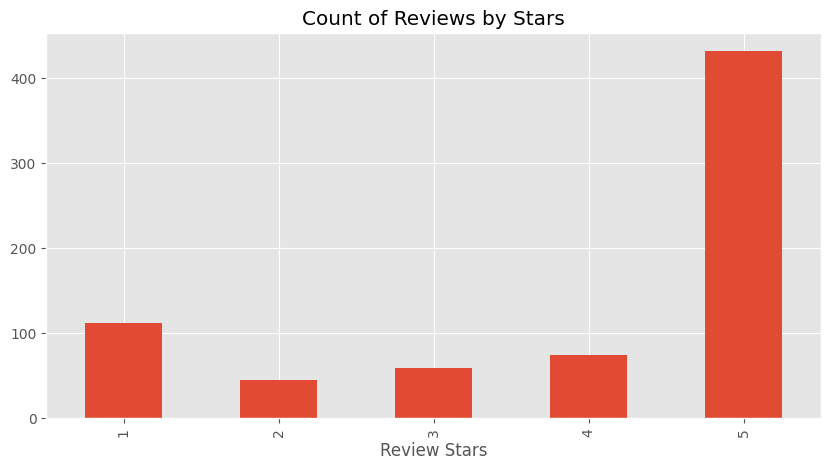

In [4]:
ax = df['score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
ex = df['content'][100]
print(ex)

Beautiful app. Only more discount needed.


In [6]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [7]:
tokens = nltk.word_tokenize(ex)
tokens[:10]

['Beautiful', 'app', '.', 'Only', 'more', 'discount', 'needed', '.']

In [8]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10061] No connection could be made because
[nltk_data]     the target machine actively refused it>


False

In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Beautiful', 'JJ'),
 ('app', 'NN'),
 ('.', '.'),
 ('Only', 'RB'),
 ('more', 'RBR'),
 ('discount', 'NN'),
 ('needed', 'VBN'),
 ('.', '.')]

In [10]:
nltk.download('maxent_ne_chunker')

[nltk_data] Error loading maxent_ne_chunker: <urlopen error [WinError
[nltk_data]     10061] No connection could be made because the target
[nltk_data]     machine actively refused it>


False

In [11]:
nltk.download('words')

[nltk_data] Error loading words: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>


False

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Beautiful/JJ)
  app/NN
  ./.
  Only/RB
  more/RBR
  discount/NN
  needed/VBN
  ./.)


In [13]:
 nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10061] No connection could be made because the target
[nltk_data]     machine actively refused it>


False

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores(ex)

{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}

In [17]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['content']
    myid = row['userName']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/719 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'userName'})
vaders = vaders.merge(df, how='left')



In [19]:
vaders.head()

,userName,neg,neu,pos,compound,score,content
0,GOHIL HARDEVSINH,0.0,0.597,0.403,0.5222,5,Very very nice application and team..👌👌
1,Margaret Hoy,0.0,0.500,0.500,0.6115,5,Quite happy with this app
2,Raffael Kummer,0.0,0.323,0.677,0.6369,5,Works perfectly again
3,David VigilDRV,0.0,0.494,0.506,0.6249,5,Great App~once one buys prime .
4,Ron Simms,0.0,1.000,0.000,0.0000,5,This app does what it says it does. Exceeded m...


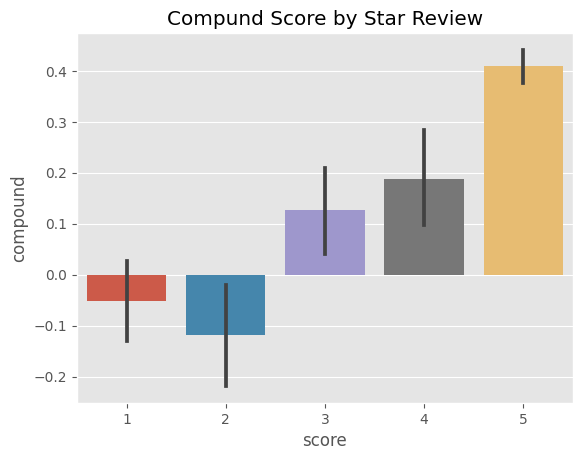

In [20]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compund Score by Star Review')
plt.show()

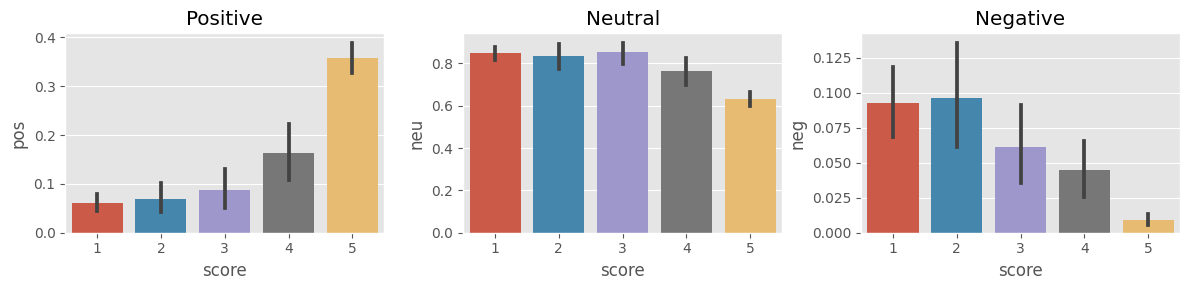

In [30]:
fig, axs = plt.subplots(1, 3,figsize=(12, 3))
sns.barplot(data=vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()